In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

In [69]:
#frame detection & extraction
import glob
path = "G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\traffic_sign\\test\*.*"
#image = cv2.imread('G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\traffic_sign\\cropped\\EightyMPH_0.png')
for bb,file in enumerate (glob.glob(path)):
    #print(bb,file)
    image= cv2.imread(file)
    copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    ROI_number = 0

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        #if w>100 and h>100:
        ROI_number += 1
        ROI = image[y:y+h, x:x+w]
        #cv2.imwrite("G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\Crop_test\\traffic_sign\\ROI_{}.png".format(bb), ROI)
        cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
        cv2.imwrite('G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\traffic_sign\\cropt{}.png'.format(bb), thresh)

print("done")   
#cv2.imshow('thresh', thresh)
#cv2.imshow('copy', copy)
#cv2.waitKey()

done


In [51]:
#Canny not used
'''import glob
path = "G:\\Yamuna docs\\College docs\\Machine learn & pattern\Project\\traffic_sign\\test_img\*.*"
for bb,file in enumerate (glob.glob(path)):
    #print(bb,file)
    image= cv2.imread(file)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(image, 150, 200, 3, 5) #image[50:170, 150:250]
    (_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    idx = 0
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if w>50 and h>50:
            idx+=1
            new_img=image[y:y+h,x:x+w]
            #writing the images in a folder which is already created
            cv2.imwrite('G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\cropped_test\\crop{}.png'.format(bb), new_img)
            #wait for 1 second
            #k = cv2.waitKey(1000)
print('Objects Cropped Successfully!') '''

Objects Cropped Successfully!


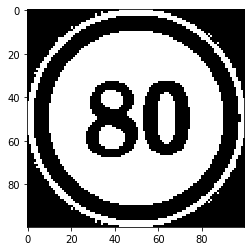

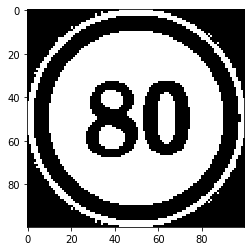

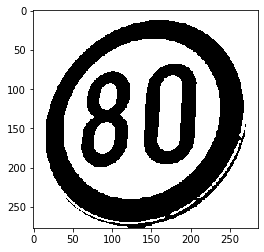

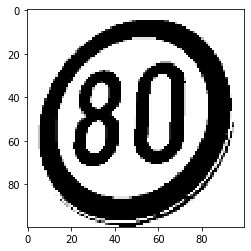

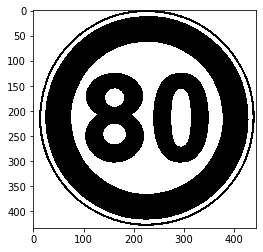

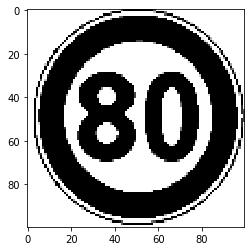

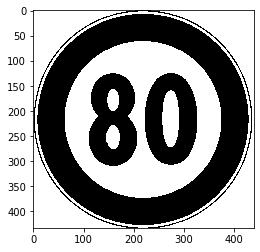

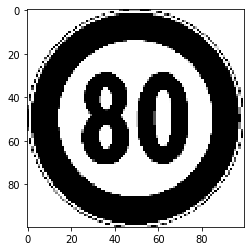

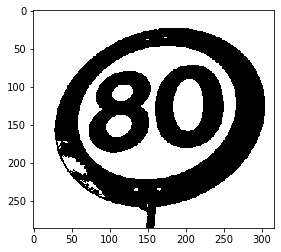

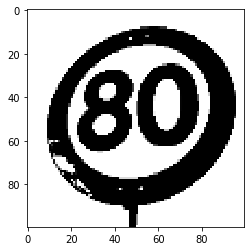

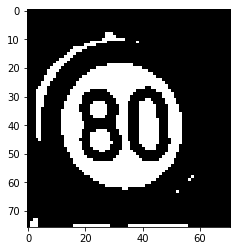

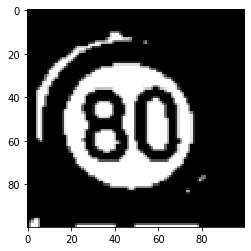

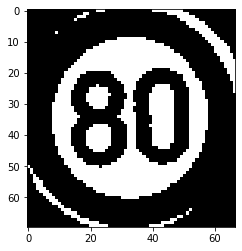

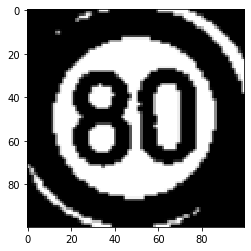

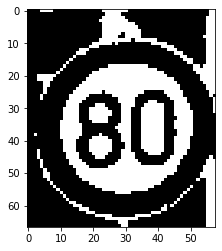

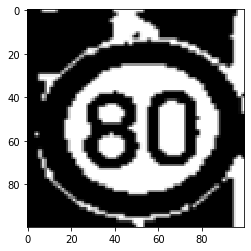

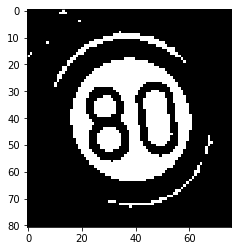

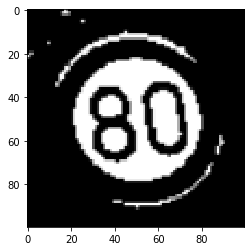

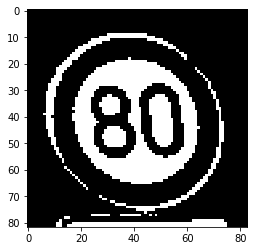

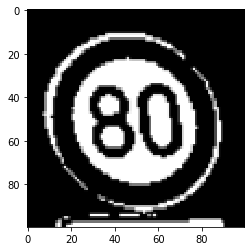

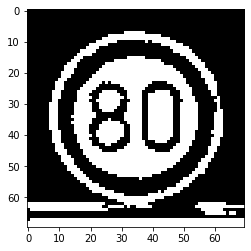

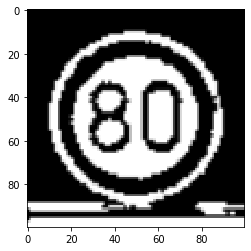

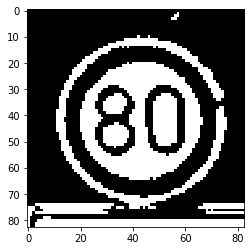

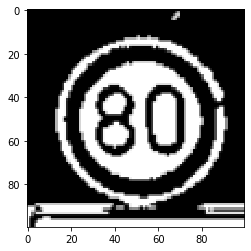

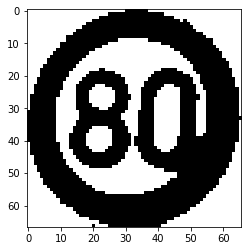

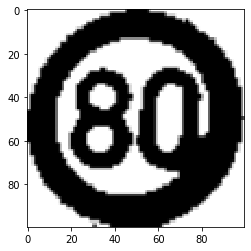

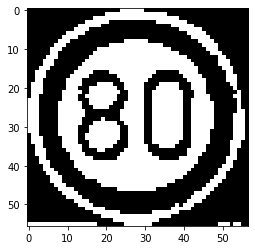

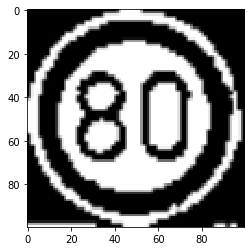

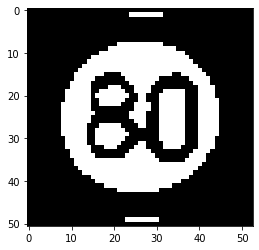

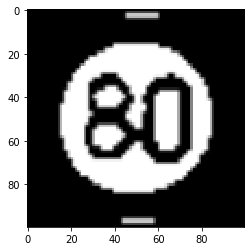

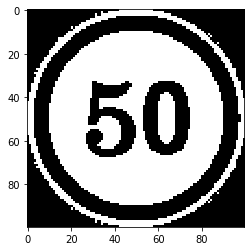

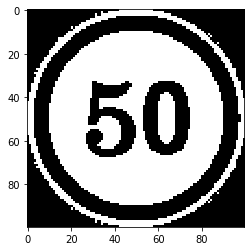

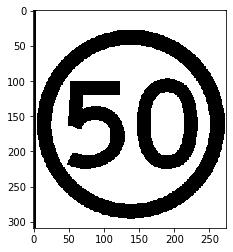

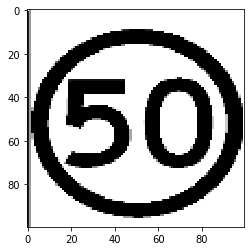

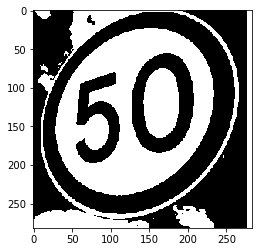

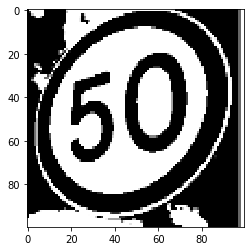

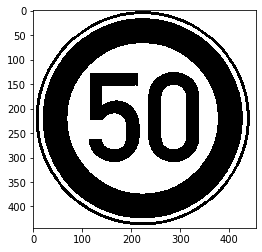

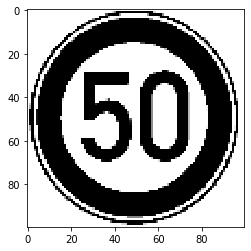

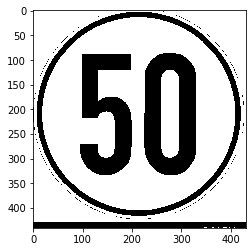

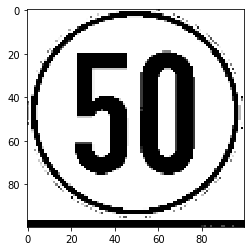

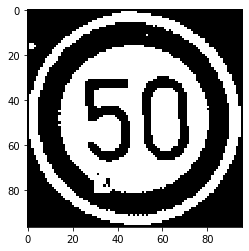

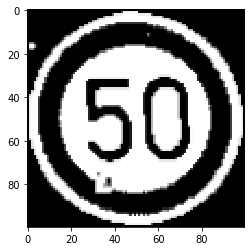

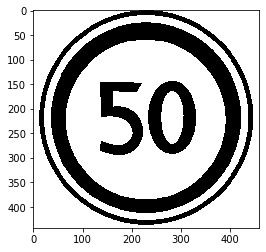

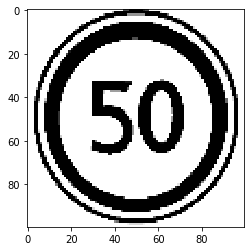

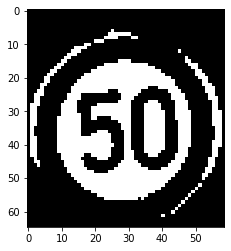

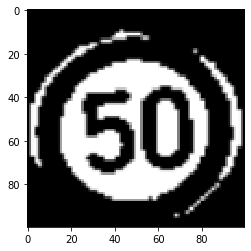

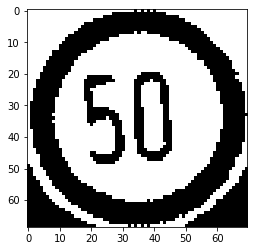

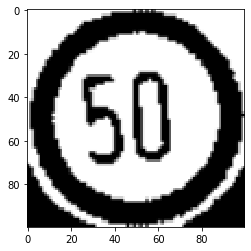

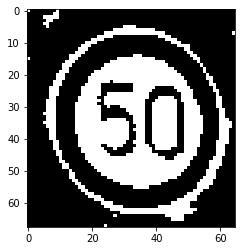

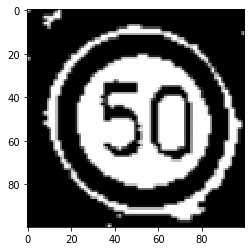

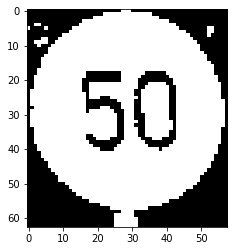

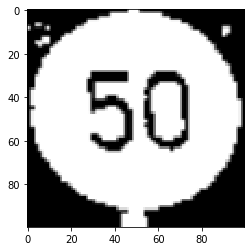

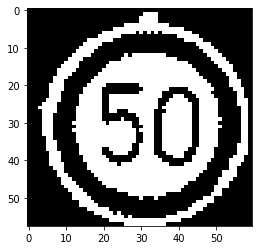

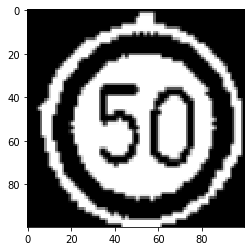

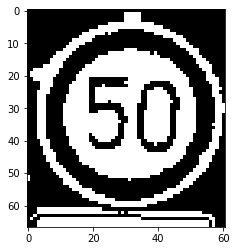

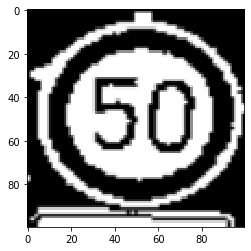

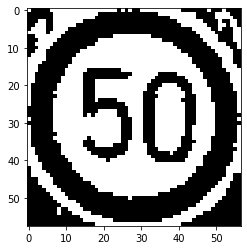

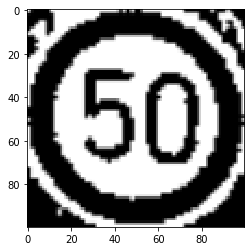

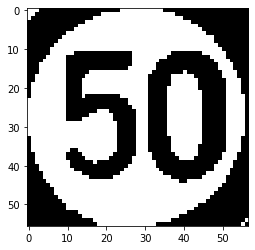

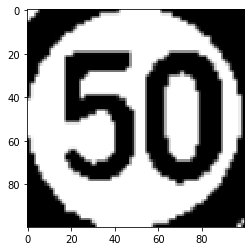

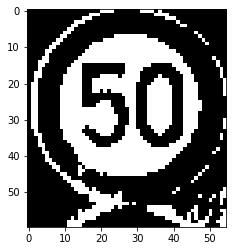

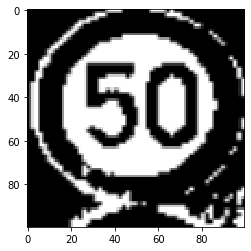

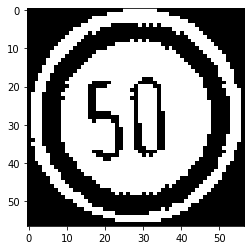

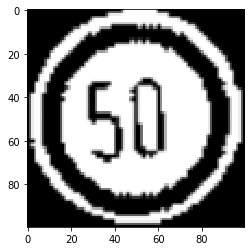

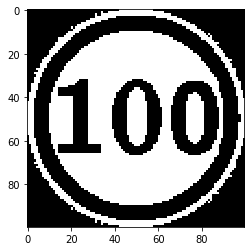

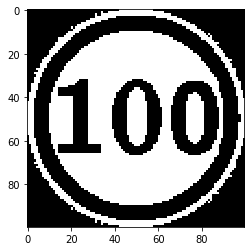

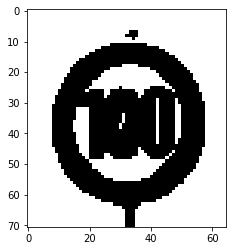

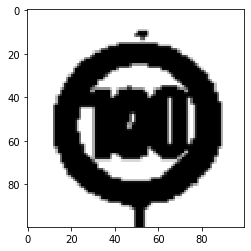

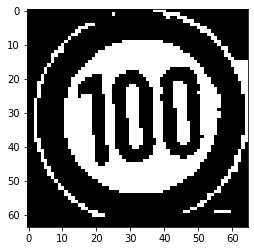

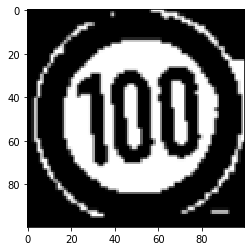

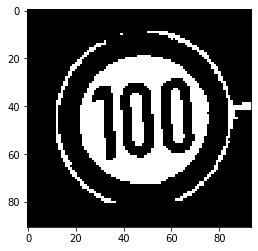

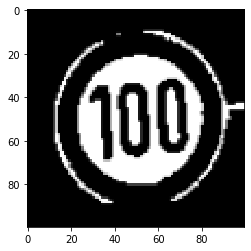

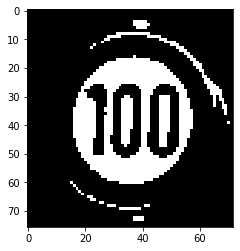

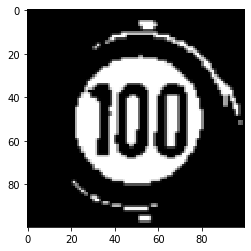

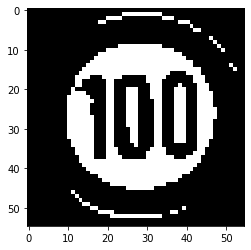

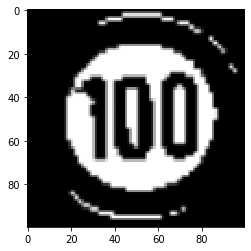

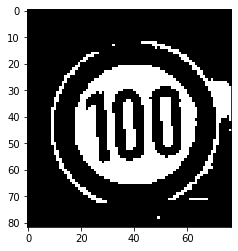

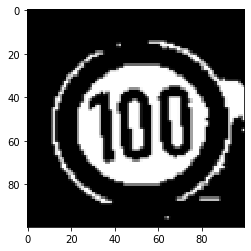

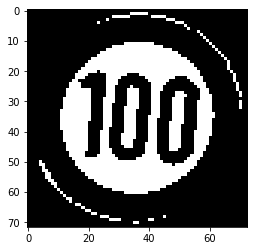

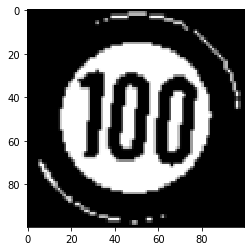

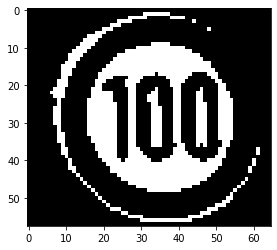

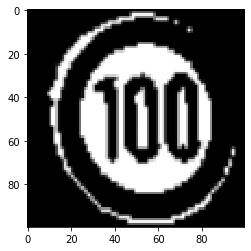

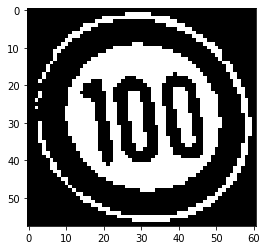

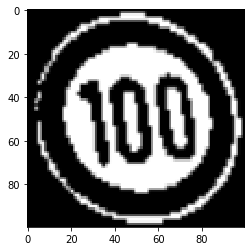

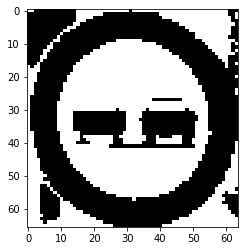

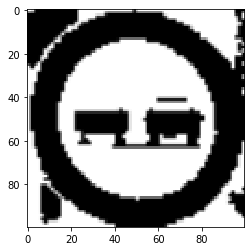

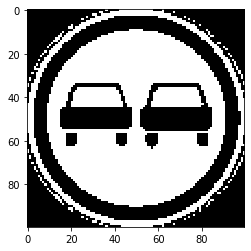

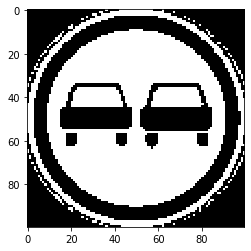

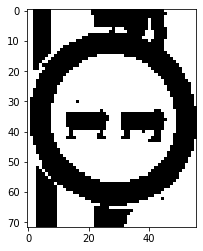

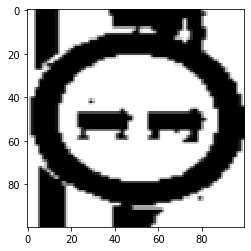

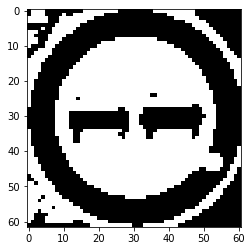

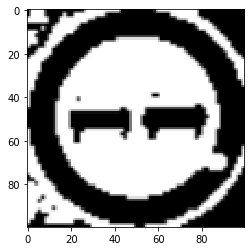

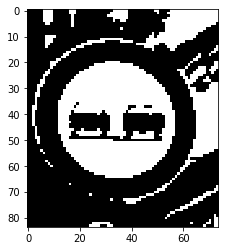

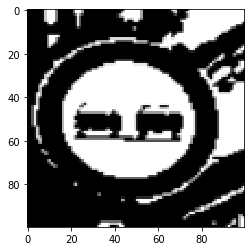

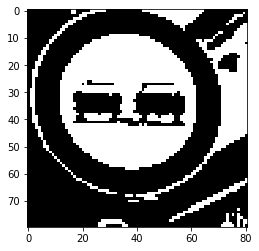

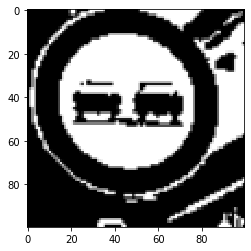

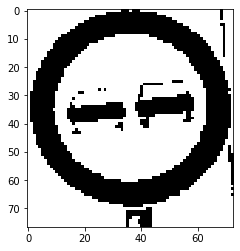

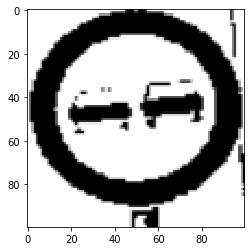

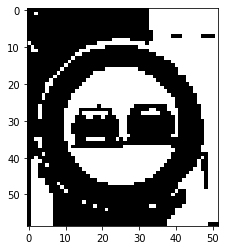

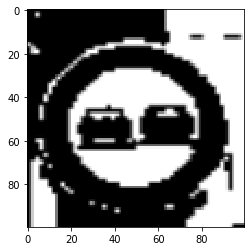

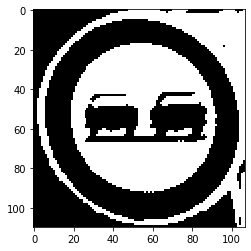

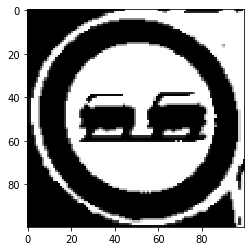

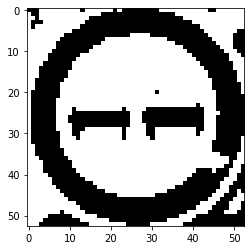

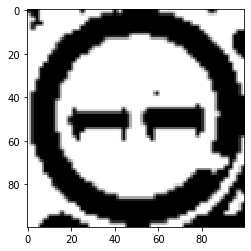

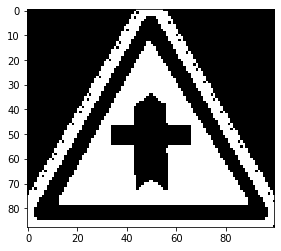

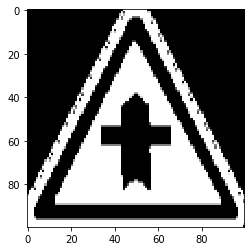

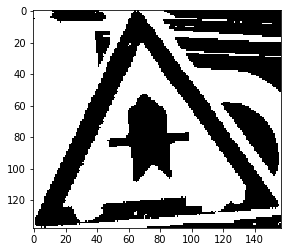

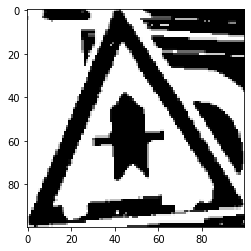

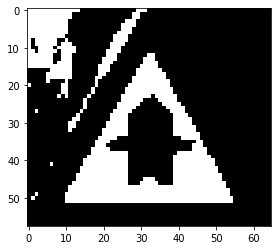

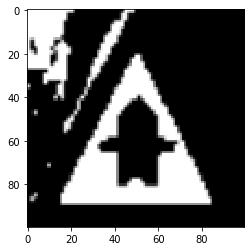

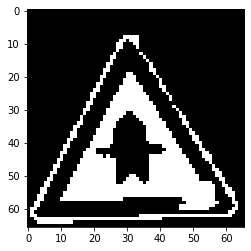

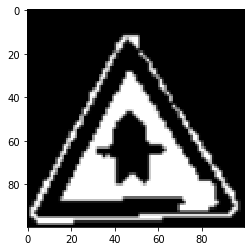

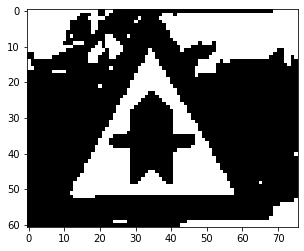

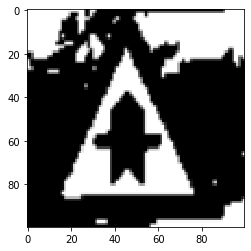

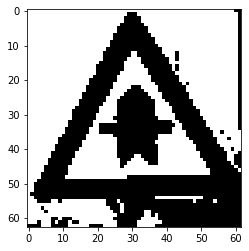

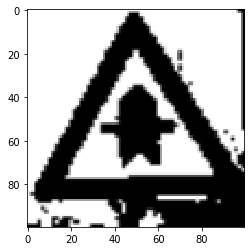

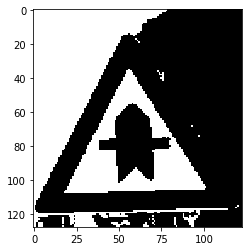

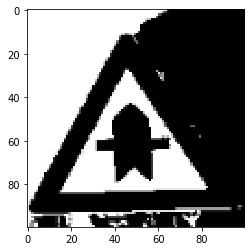

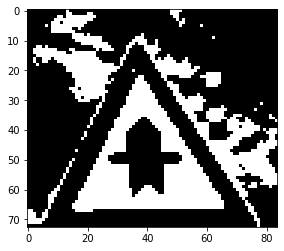

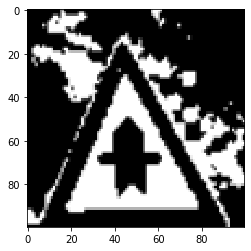

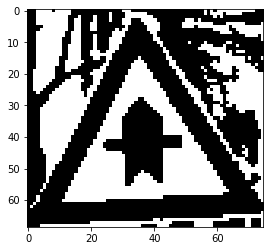

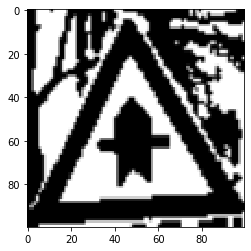

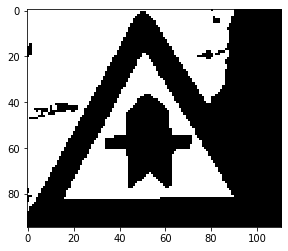

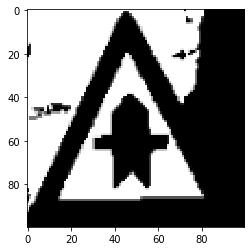

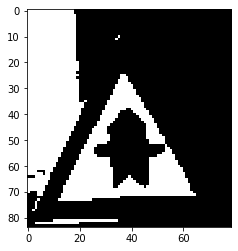

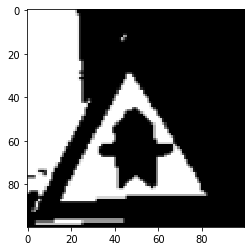

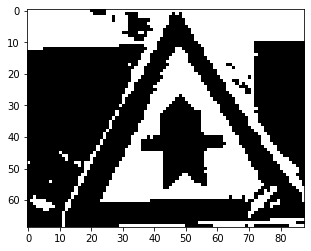

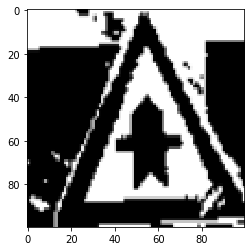

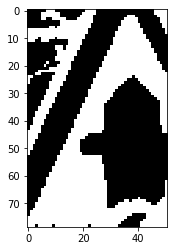

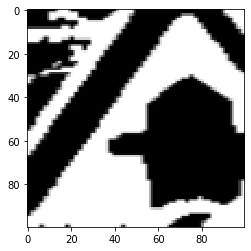

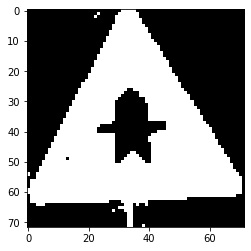

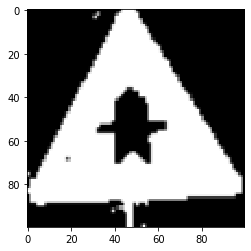

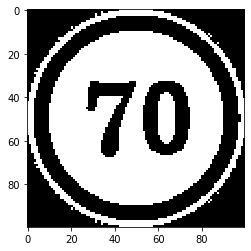

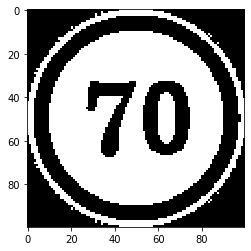

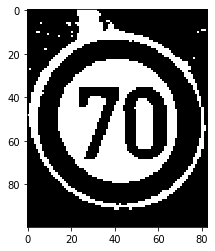

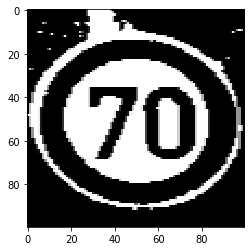

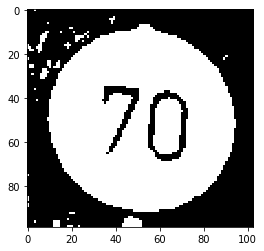

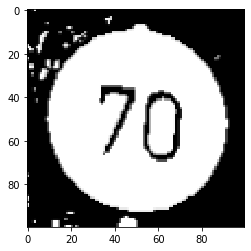

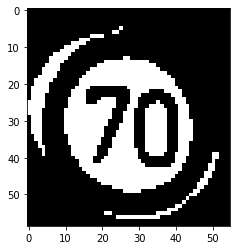

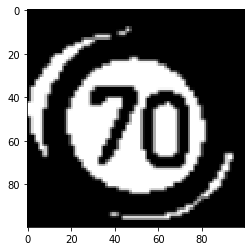

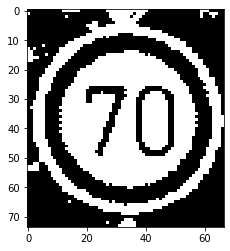

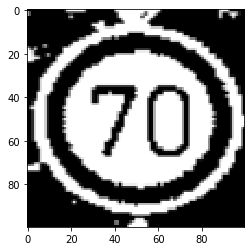

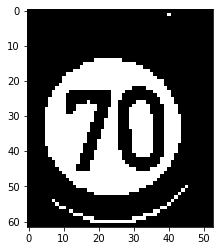

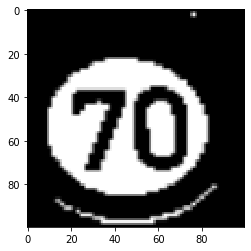

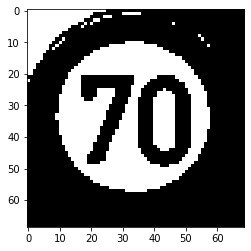

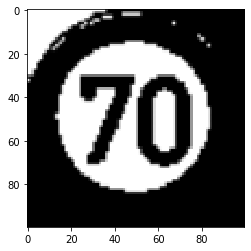

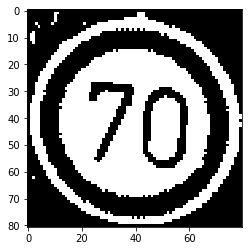

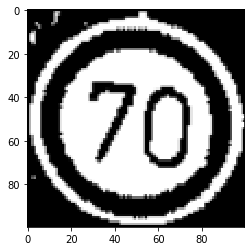

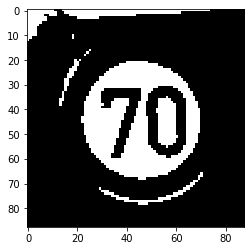

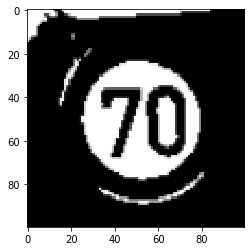

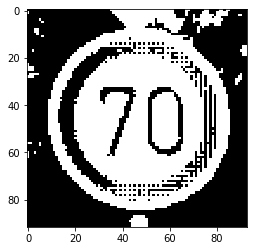

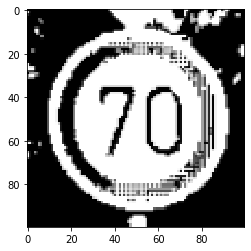

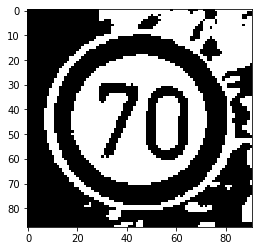

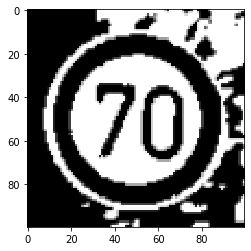

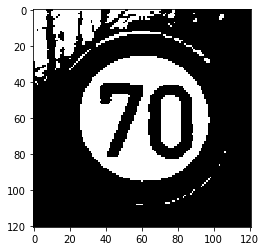

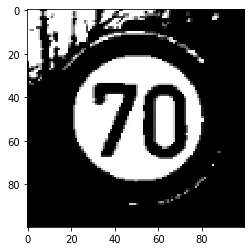

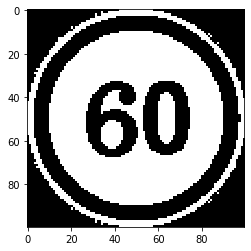

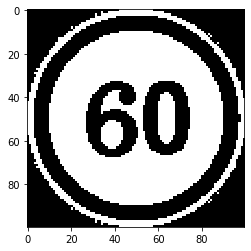

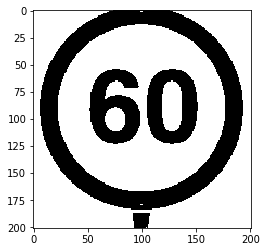

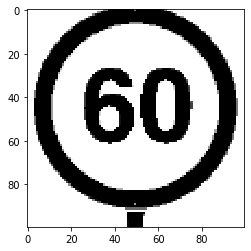

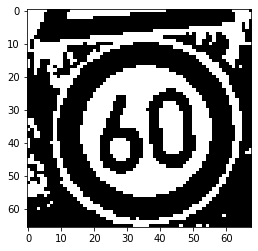

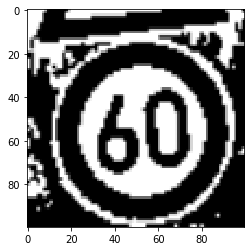

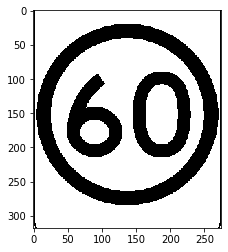

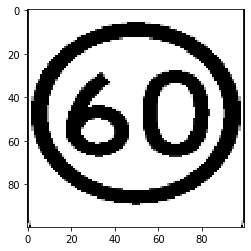

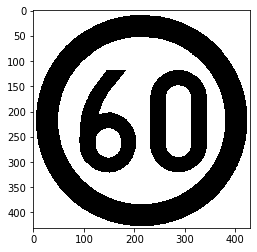

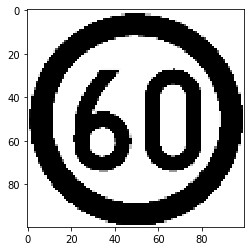

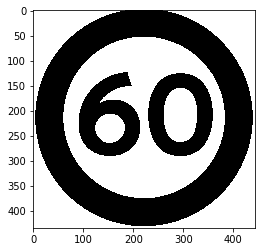

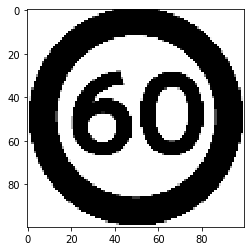

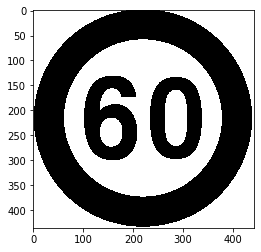

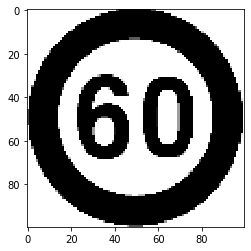

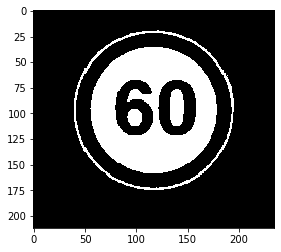

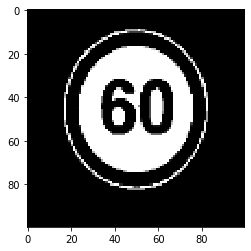

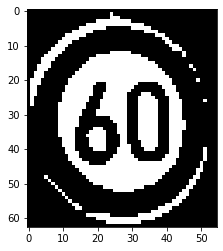

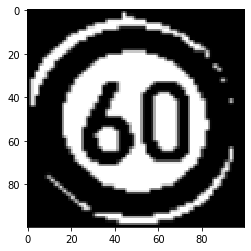

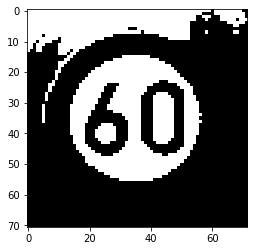

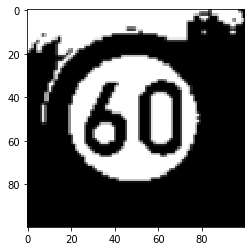

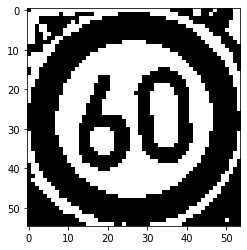

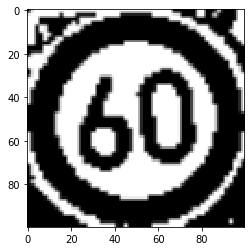

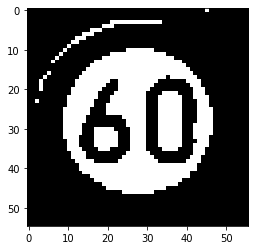

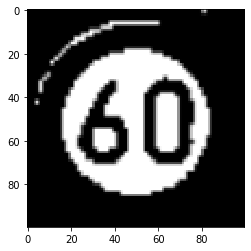

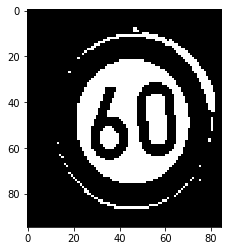

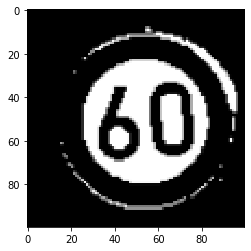

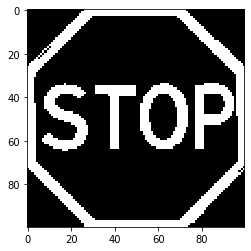

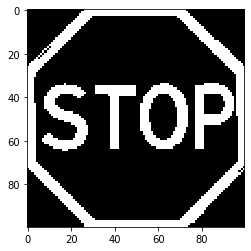

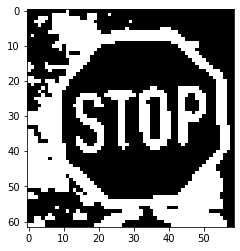

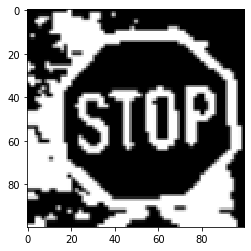

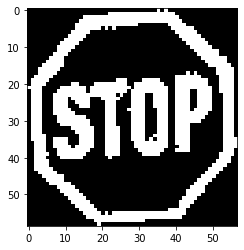

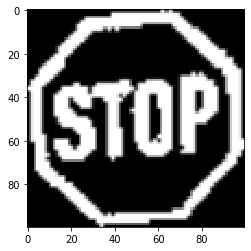

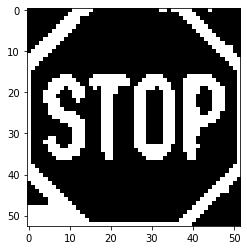

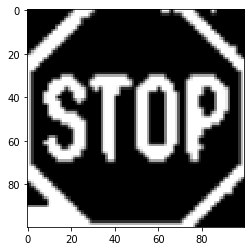

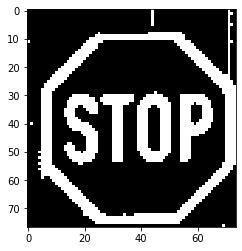

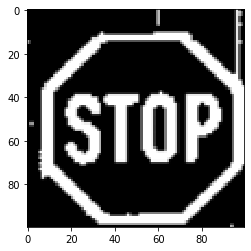

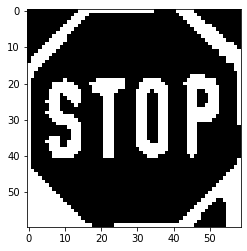

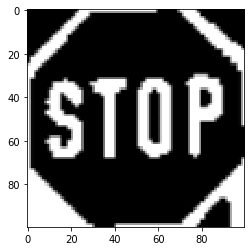

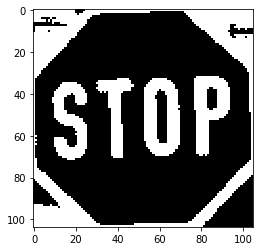

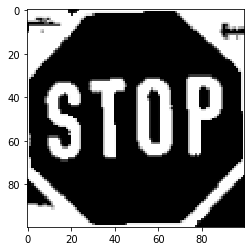

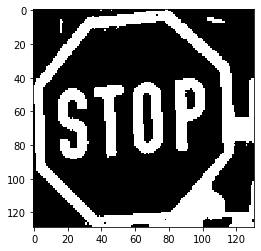

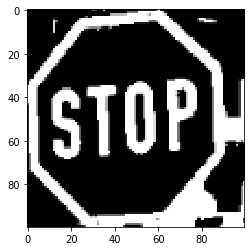

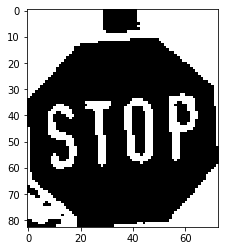

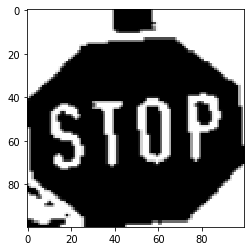

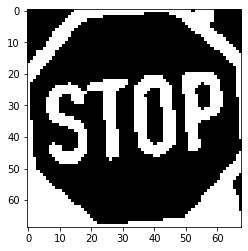

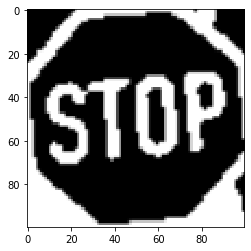

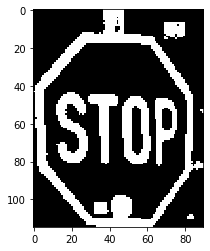

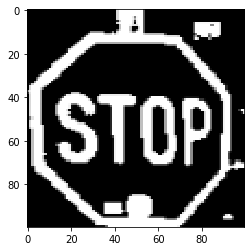

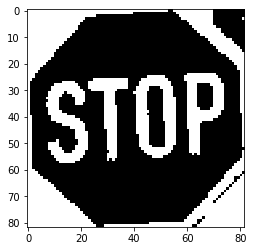

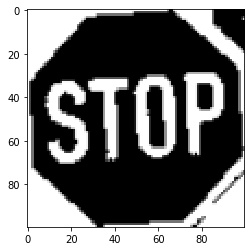

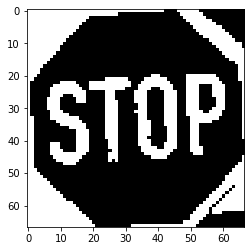

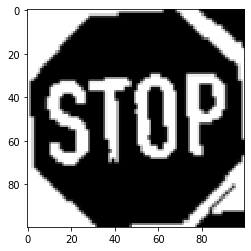

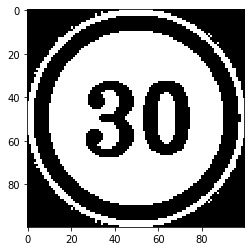

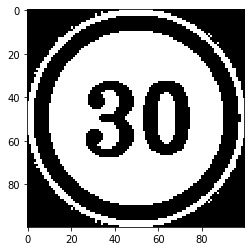

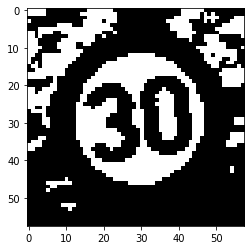

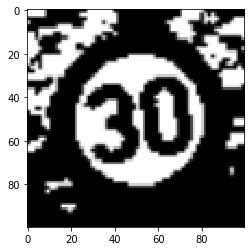

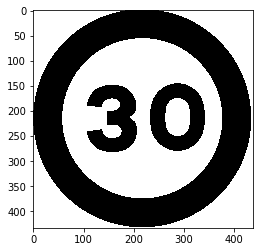

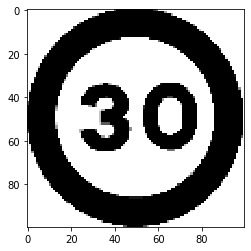

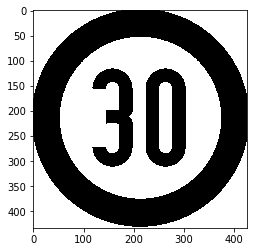

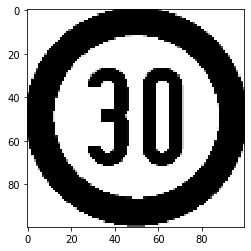

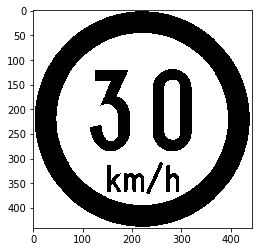

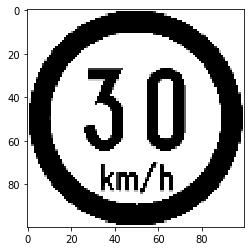

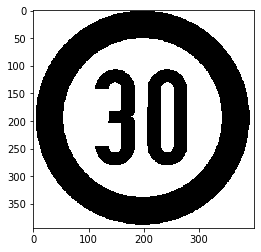

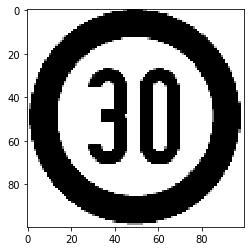

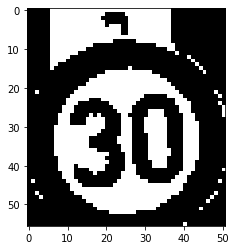

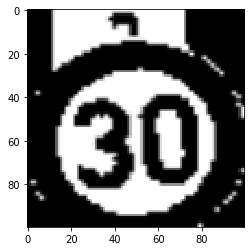

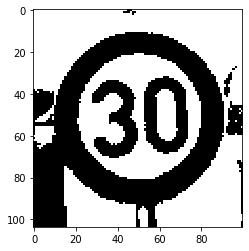

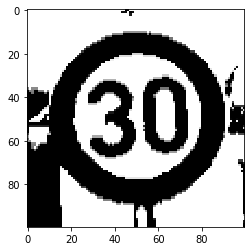

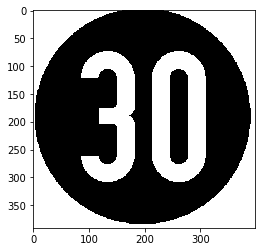

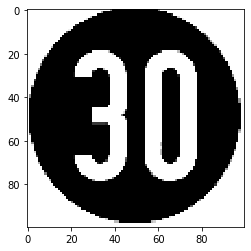

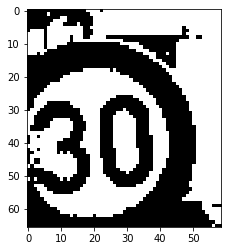

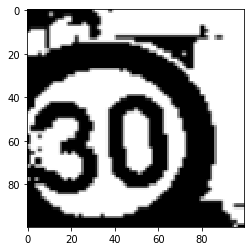

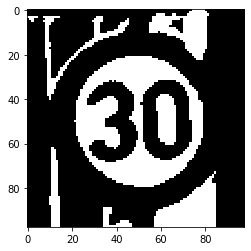

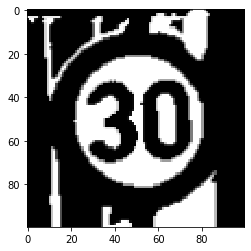

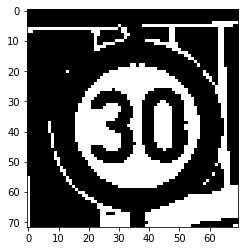

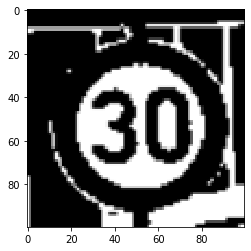

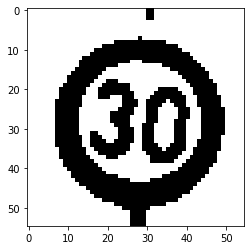

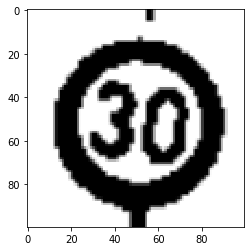

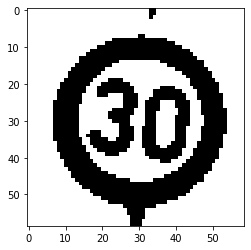

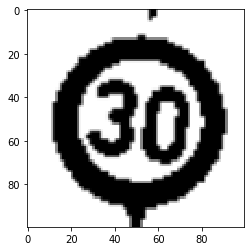

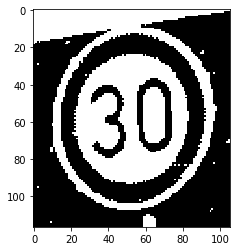

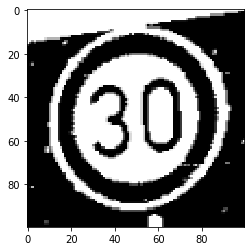

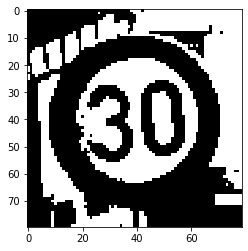

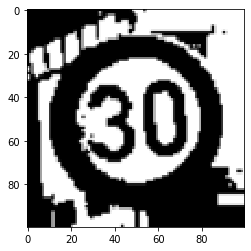

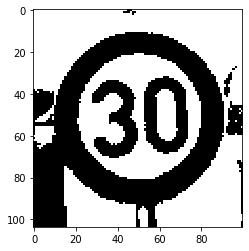

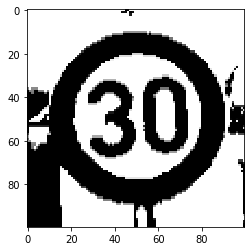

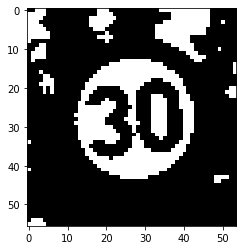

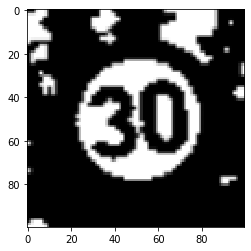

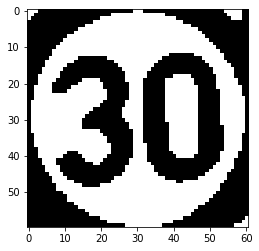

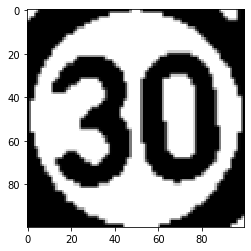

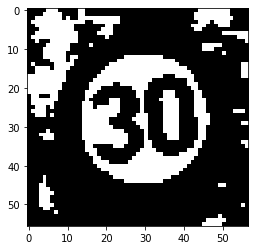

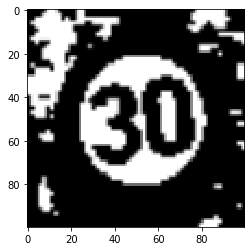

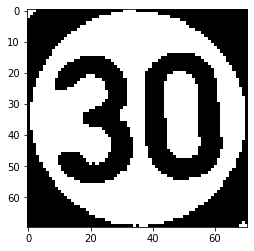

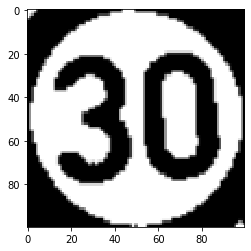

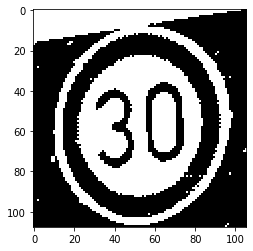

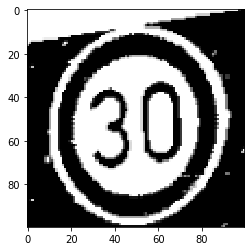

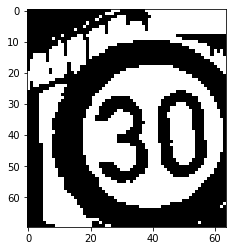

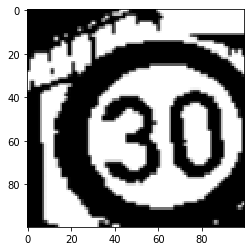

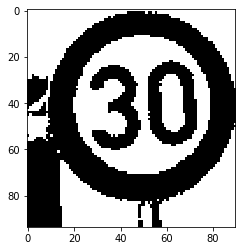

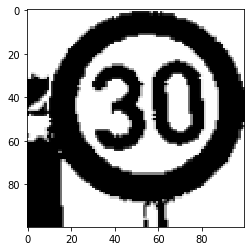

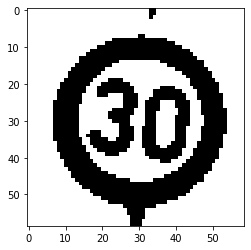

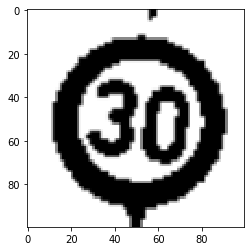

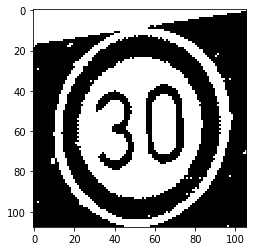

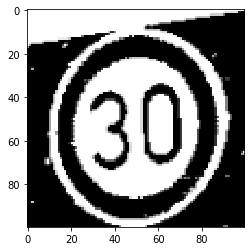

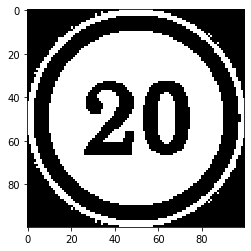

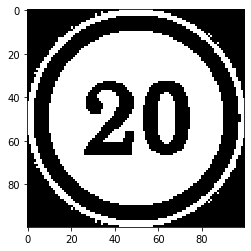

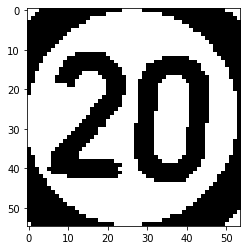

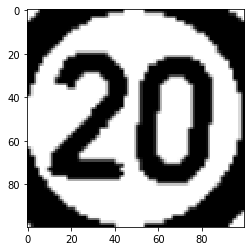

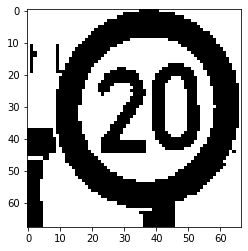

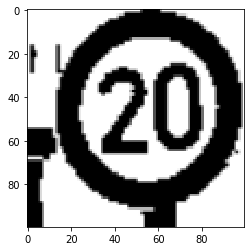

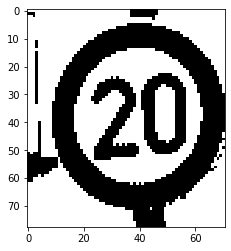

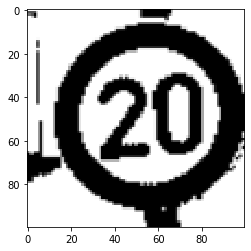

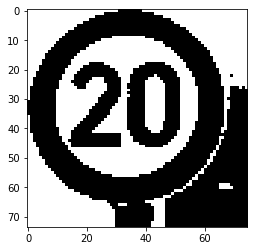

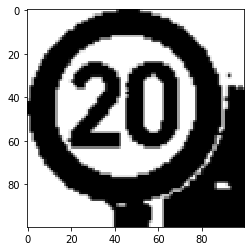

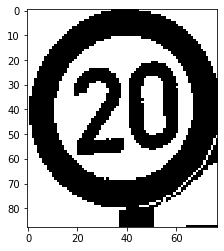

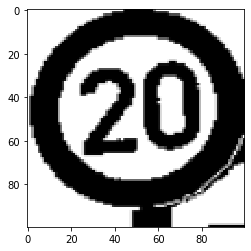

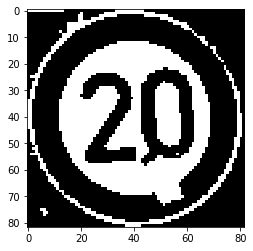

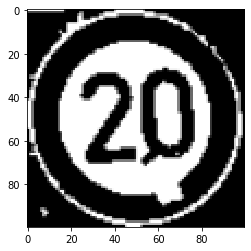

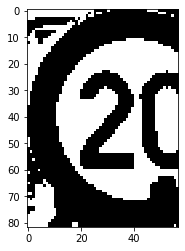

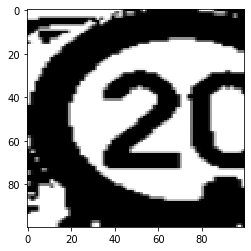

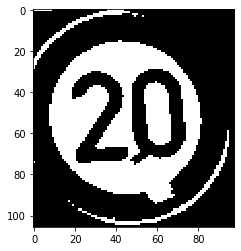

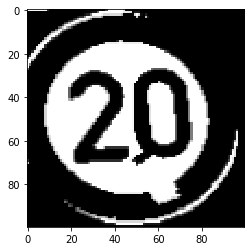

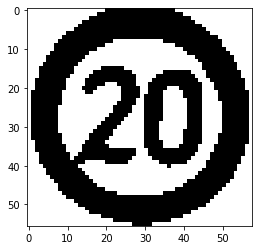

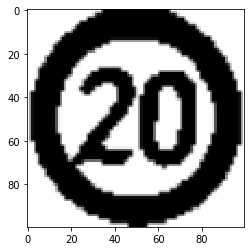

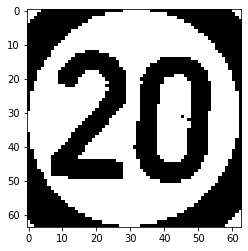

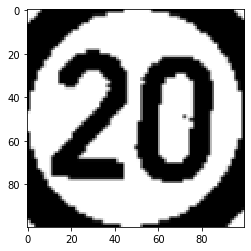

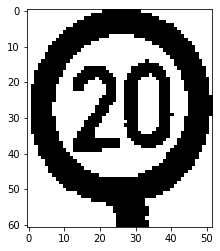

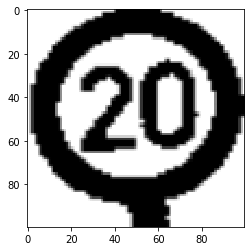

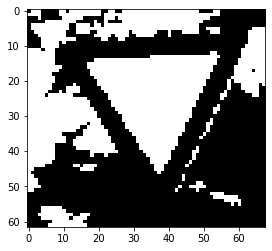

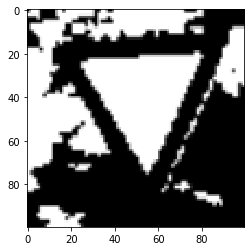

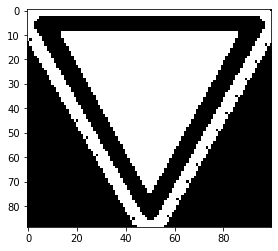

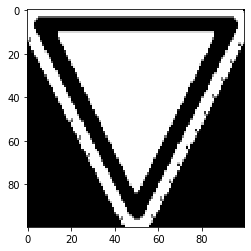

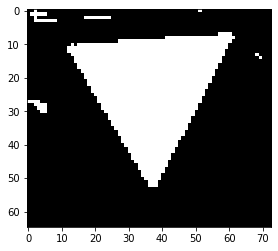

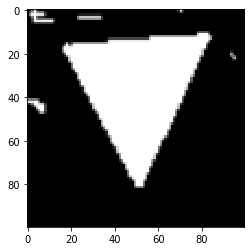

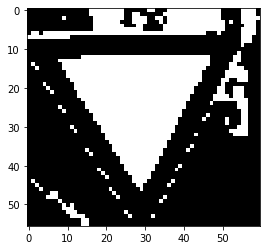

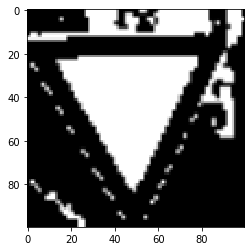

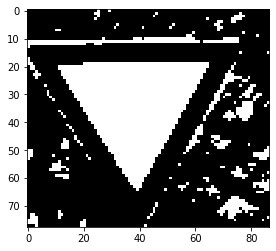

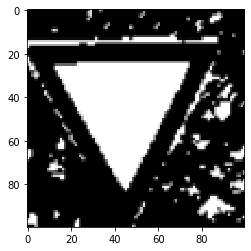

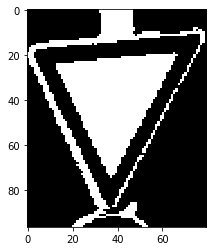

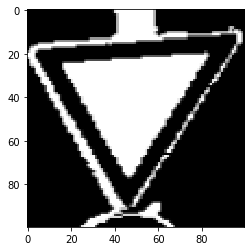

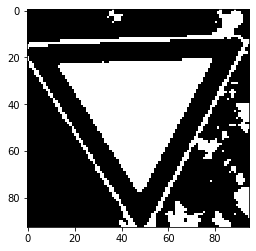

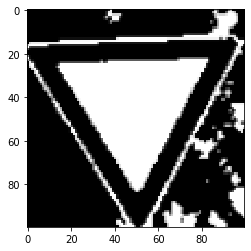

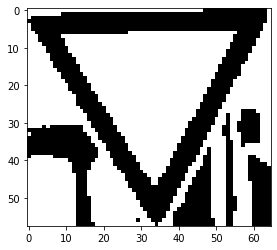

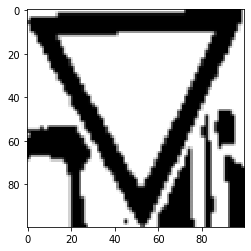

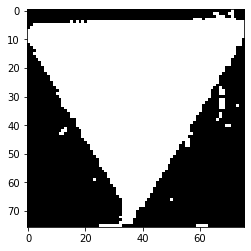

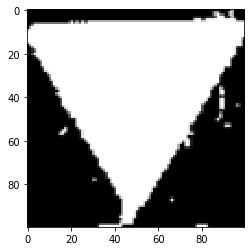

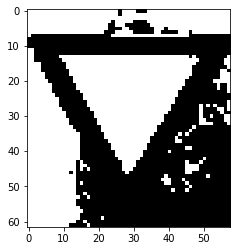

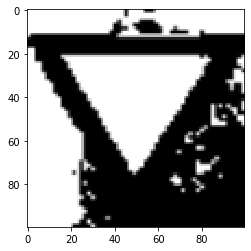

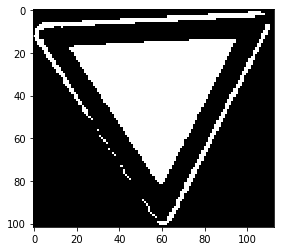

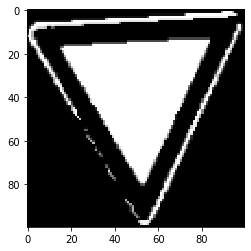

In [70]:
str="G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\traffic_sign\\Crop/" #Cropped Image database for recognization

ncompnts=20
entries=os.listdir(str)
set=1
for entry in entries:
    if entry.endswith(".png") or entry.endswith(".jfif"):
#        print(entry)
        image = cv2.imread(str + entry)
#        plt.imshow(image)
#        plt.show()
        
        #img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#        plt.imshow(img_rgb)
#        plt.show()

        img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(img_gray,cmap=plt.get_cmap('gray'))
        plt.show()
        
        faces = (img_gray)
        if len(faces)>0:
            #for (x,y) in faces:
                #roi_gray = img_gray[y:y, x:x]
            roi_gray_resize=cv2.resize(img_gray,(100, 100))
            plt.imshow(roi_gray_resize,cmap=plt.get_cmap('gray'))
            plt.show()
        
            fa=np.array(roi_gray_resize)
            fa=fa.flatten()
            if(set==1):               
                dm=np.array(fa.T)
                m=entry.find('.')
                fname=entry[0:m-1]
                img_class=''.join([i for i in fname if not i.isdigit()])
                set=0;
            else:               
                dm=np.column_stack((dm,fa.T))
                m=entry.find('.')
                s=entry[0:m]
                fname=np.column_stack((fname,s))
                s1=''.join([i for i in s if not i.isdigit()])
                img_class=np.column_stack((img_class,s1)) 
                
    else:
        print('Image not good',entry)



       # faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
       # faces = (img_gray)
      #  if len(faces)>0:
            
#        print(faces)
          #  for (x,y,w,h) in faces:
    #img_rgb = cv2.rectangle(img_gray,(x,y),(x+w,y+h),(255,0,0),2)
               # roi_gray = img_gray[y:y+h, x:x+w]
#    roi_color = img_rgb[y:y+h, x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
#    for (ex,ey,ew,eh) in eyes:
#        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
       
        
          #  roi_gray_resize=cv2.resize(roi_gray,(200,200))
           # plt.imshow(roi_gray_resize,cmap=plt.get_cmap('gray'))
            #plt.show()
        
#        cv2.imshow('img',roi_gray_resize)
#        cv2.waitKey(0)
#        cv2.destroyAllWindows()     


In [71]:
# Standardizing the Observations
M=pd.DataFrame(dm,columns =fname.tolist())
Mmean = M.mean(axis=1)
NM=M.sub(Mmean,axis='rows')
pca = PCA(n_components=ncompnts)
NMtransform = pca.fit_transform(NM.T)
NMtransform.shape


(153, 20)

In [72]:
#Eigenvector

principalDf = pd.DataFrame(data = pca.components_.T)
principalDf

0         1         2         3         4         5         6   \
0     0.017116  0.005248  0.002087 -0.000724 -0.001920  0.019328  0.007323   
1     0.017724  0.004804  0.002558 -0.000300 -0.001153  0.018701  0.009414   
2     0.018060  0.004420  0.002629 -0.000054 -0.000752  0.019277  0.011692   
3     0.017122  0.004377  0.002854  0.000582  0.000860  0.019918  0.012613   
4     0.017571  0.004758  0.001230  0.001864 -0.000228  0.023095  0.009525   
5     0.018316  0.002962 -0.000830  0.001701  0.000913  0.024858  0.007556   
6     0.019065  0.001013 -0.002247  0.001530  0.001290  0.025135  0.005520   
7     0.018995  0.000574 -0.002993  0.001085  0.001372  0.024936  0.004678   
8     0.018630  0.001022 -0.004024 -0.000306  0.001350  0.023871  0.004744   
9     0.018734  0.001459 -0.004383 -0.000755  0.002100  0.023920  0.004946   
10    0.018991  0.001032 -0.004203 -0.001002  0.002275  0.023056  0.005324   
11    0.019004  0.000623 -0.004183 -0.001217  0.002750  0.022597  0.005606   
12    0.019024  0.000870 -0.003543  0.000082  0.001809  0.024004  0.005785   
13    0.019336  0.001167 -0.002879  0.000658  0.001361  0.024299  0.006967   
14    0.019667  0.001395 -0.002407  0.000464  0.001474  0.023611  0.007625   
15    0.019917  0.001336 -0.002310  0.000929  0.001206  0.023300  0.008419   
16    0.019749  0.001193 -0.002742  0.001155  0.001700  0.023496  0.007450   
17    0.019646  0.001763 -0.003280  0.000359  0.003435  0.023730  0.007232   
18    0.019586  0.002215 -0.002943  0.000242  0.003772  0.022471  0.008848   
19    0.019266  0.002298 -0.002025 -0.001275  0.003666  0.021615  0.009631   
20    0.019079  0.001682 -0.002423 -0.002104  0.004486  0.021623  0.009984   
21    0.019219  0.001477 -0.003013 -0.002418  0.005361  0.019937  0.009628   
22    0.019523  0.001711 -0.004091 -0.002519  0.006166  0.017134  0.007441   
23    0.019788  0.001320 -0.005082 -0.003375  0.007045  0.014669  0.005574   
24    0.020051  0.001535 -0.006580 -0.001446  0.006969  0.013247  0.004437   
25    0.019987  0.001814 -0.006457 -0.001105  0.006433  0.013294  0.003692   
26    0.020522  0.000846 -0.006470  0.000370  0.006683  0.010377  0.004637   
27    0.020812  0.000425 -0.006200  0.000972  0.007445  0.010887  0.005993   
28    0.020323  0.000836 -0.006727  0.000660  0.007781  0.012240  0.006577   
29    0.020116  0.001002 -0.007371  0.001264  0.008318  0.013723  0.008309   
...        ...       ...       ...       ...       ...       ...       ...   
9970  0.019139 -0.000611 -0.009625  0.000789  0.000782 -0.006735 -0.010751   
9971  0.018899  0.000794 -0.009536  0.001474  0.000516 -0.006489 -0.011652   
9972  0.018405  0.002340 -0.009858  0.001166  0.000550 -0.007318 -0.012719   
9973  0.018378  0.002898 -0.010098  0.000863  0.000961 -0.007936 -0.012951   
9974  0.018415  0.002765 -0.009594 -0.000713  0.001712 -0.006520 -0.012675   
9975  0.018116  0.003022 -0.009205 -0.000713  0.001418 -0.004819 -0.012300   
9976  0.017668  0.003313 -0.008169 -0.001781  0.001762 -0.003050 -0.011101   
9977  0.017670  0.002131 -0.005069 -0.006725  0.003493 -0.002253 -0.008302   
9978  0.017594  0.001899 -0.004052 -0.008899  0.004906 -0.002697 -0.006470   
9979  0.017632  0.002109 -0.004077 -0.009526  0.005904 -0.002495 -0.007099   
9980  0.017902  0.002374 -0.004006 -0.009366  0.006012 -0.001981 -0.006903   
9981  0.018161  0.002280 -0.003938 -0.009509  0.005579 -0.002315 -0.007332   
9982  0.017878  0.002012 -0.004461 -0.009810  0.004731 -0.002819 -0.008800   
9983  0.017648  0.002203 -0.004664 -0.008871  0.002334 -0.001928 -0.010616   
9984  0.017888  0.002179 -0.004116 -0.008077  0.001987 -0.002495 -0.009894   
9985  0.017792  0.002110 -0.003999 -0.008456  0.001890 -0.003608 -0.008913   
9986  0.017568  0.001893 -0.003975 -0.008953  0.001443 -0.004602 -0.007519   
9987  0.017629  0.001581 -0.003534 -0.008603  0.001576 -0.005979 -0.005062   
9988  0.017602  0.001680 -0.003316 -0.008045  0.001699 -0.007440 -0.003745   
9989  0.017692  0.002304 -0.003072

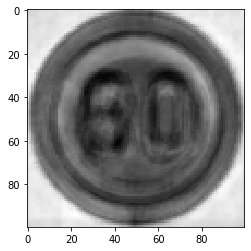

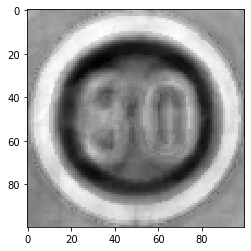

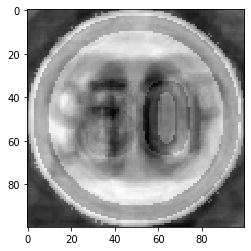

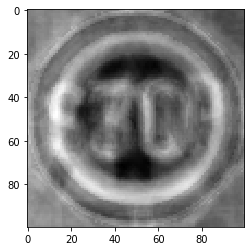

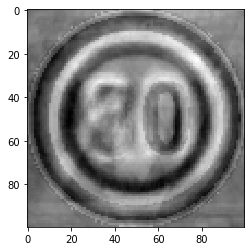

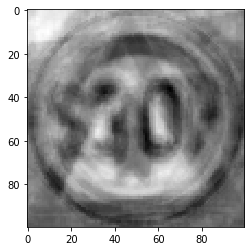

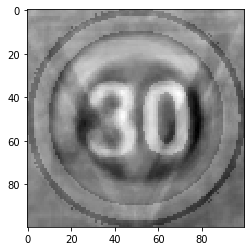

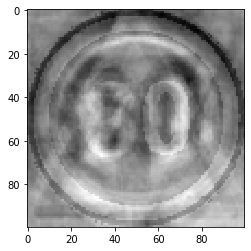

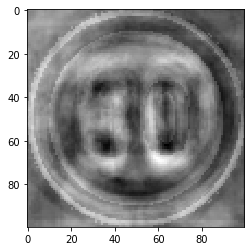

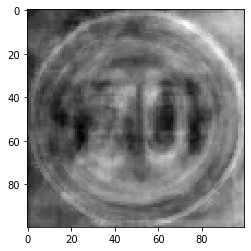

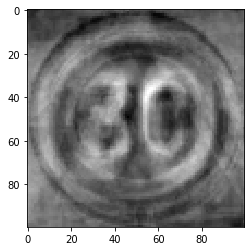

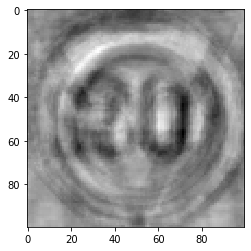

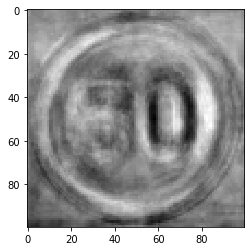

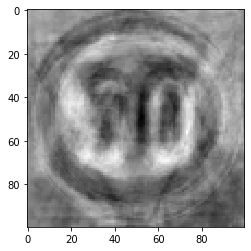

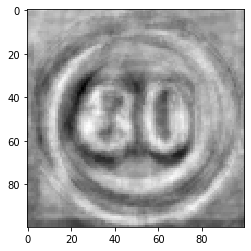

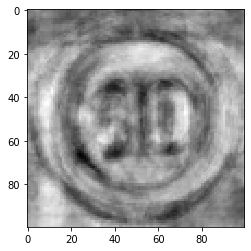

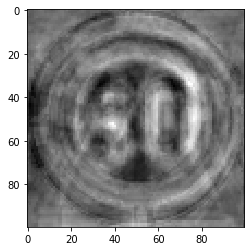

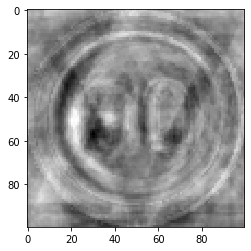

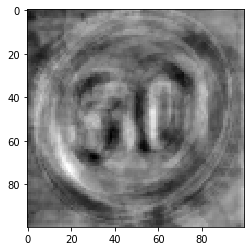

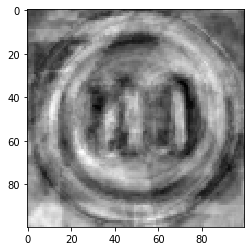

In [73]:
for colmn in range(0,ncompnts):
    z1=principalDf[colmn].values.reshape((100,100))
    plt.imshow(z1,cmap=plt.get_cmap('gray'))
    plt.show()

In [74]:
#KNN classification

knn_classifier = KNeighborsClassifier(n_neighbors = 1)
knn_classifier.fit(NMtransform, img_class.T.ravel())



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Image Testing


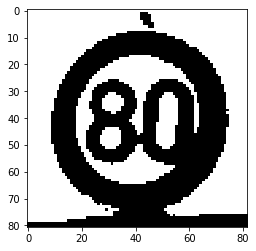

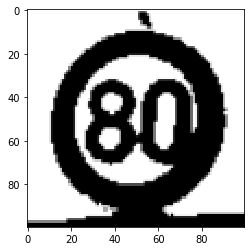

Predicted--> ['ThirtyMPH_']


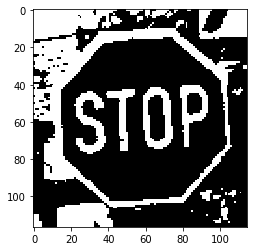

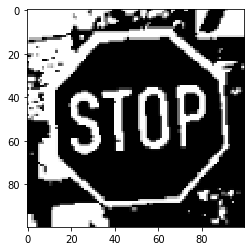

Predicted--> ['Stop_']


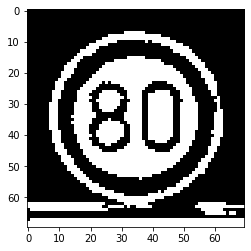

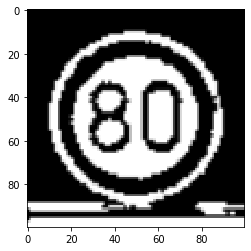

Predicted--> ['EightyMPH_']


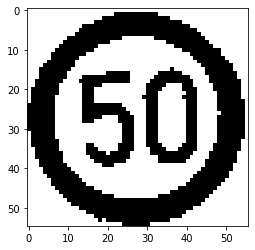

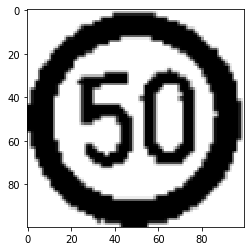

Predicted--> ['TwentyMPH_']


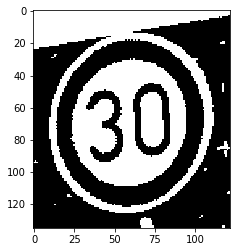

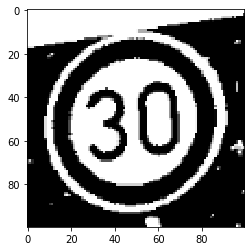

Predicted--> ['ThirtyMPH_']


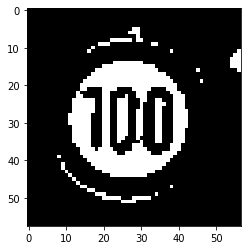

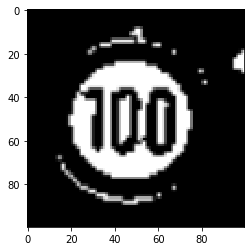

Predicted--> ['EightyMPH_']


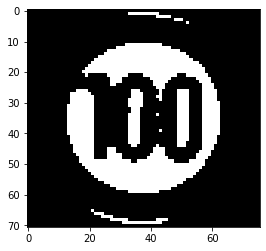

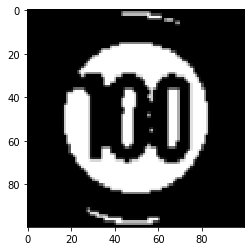

Predicted--> ['HundredMPH_']


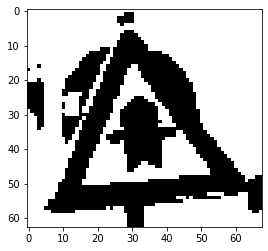

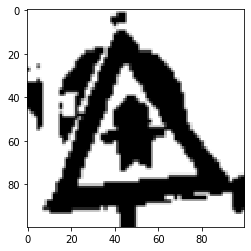

Predicted--> ['Priority_']


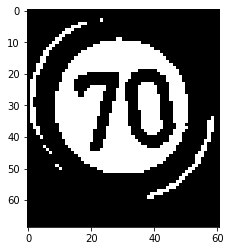

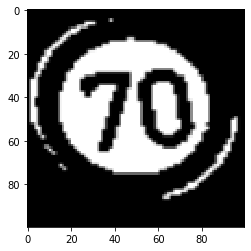

Predicted--> ['FiftyMPH_']


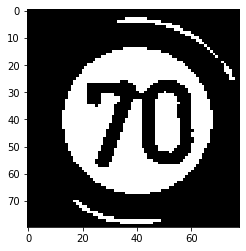

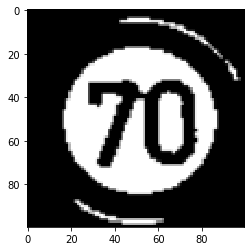

Predicted--> ['SixtyMPH_']


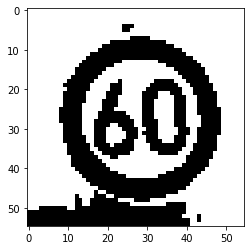

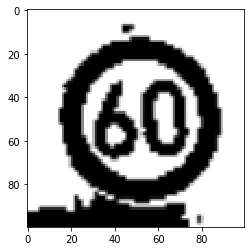

Predicted--> ['ThirtyMPH_']


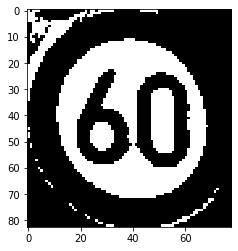

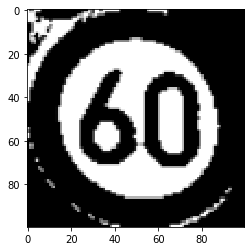

Predicted--> ['SixtyMPH_']


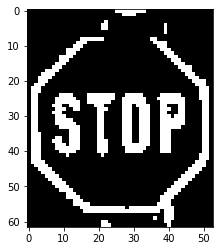

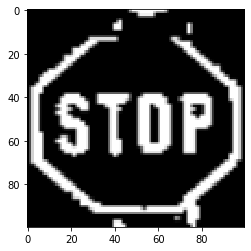

Predicted--> ['Stop_']


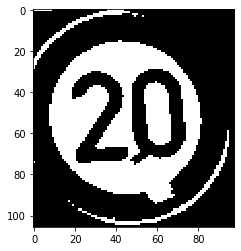

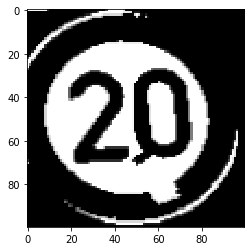

Predicted--> ['TwentyMPH_']


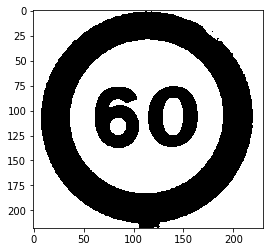

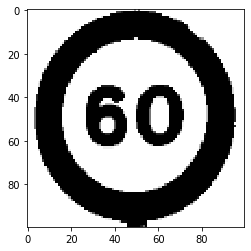

Predicted--> ['FiftyMPH_']


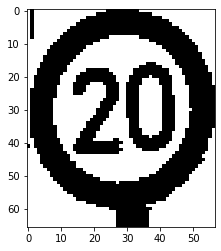

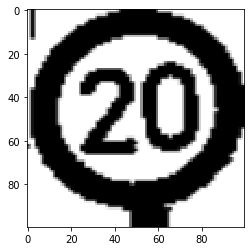

Predicted--> ['TwentyMPH_']


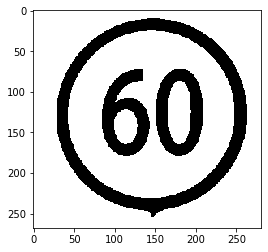

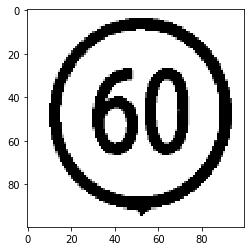

Predicted--> ['FiftyMPH_']


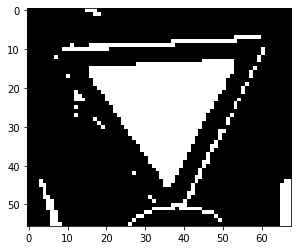

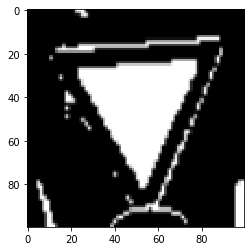

Predicted--> ['Yield_']


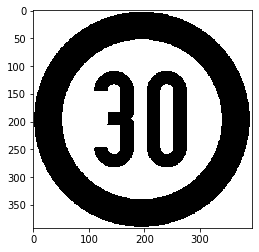

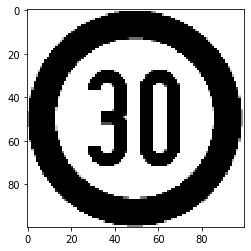

Predicted--> ['ThirtyMPH_']


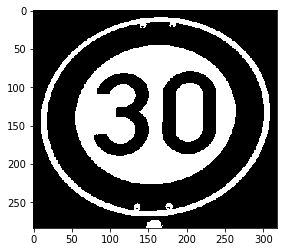

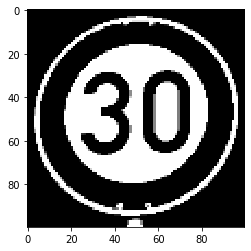

Predicted--> ['HundredMPH_']


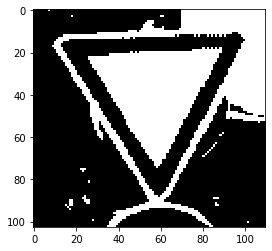

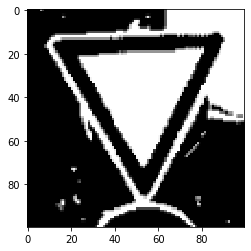

Predicted--> ['Yield_']


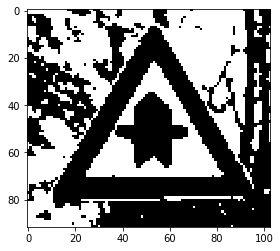

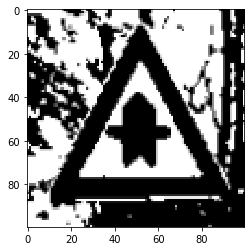

Predicted--> ['Priority_']


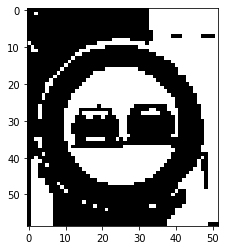

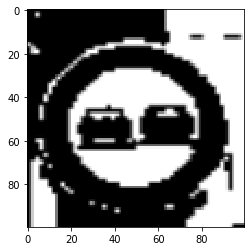

Predicted--> ['NoPassing_']


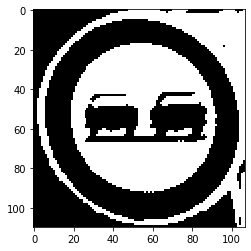

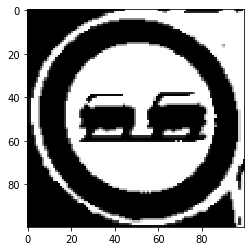

Predicted--> ['NoPassing_']


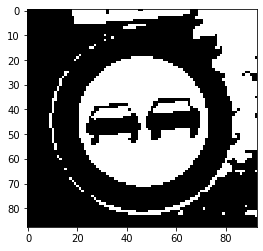

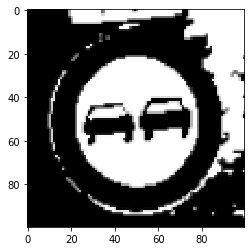

Predicted--> ['NoPassing_']


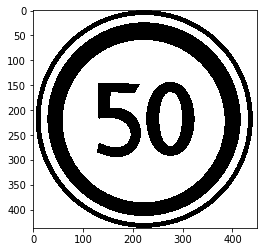

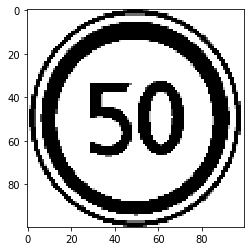

Predicted--> ['FiftyMPH_']


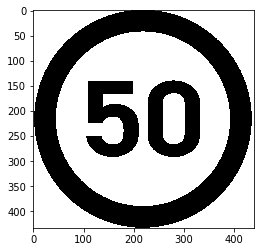

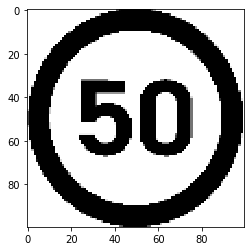

Predicted--> ['ThirtyMPH_']


In [75]:
print('Image Testing')

#label_mng= pd.DataFrame(data=[['20','Speed limit 20MPH'],['30', 'Speed limit 30MPH']], columns= ['Label','Name'])
#print(label_mng)

str="G:\\Yamuna docs\\College docs\\Machine learn & pattern\\Project\\traffic_sign\\traffic_sign\\\Crop_test/" #Cropped test Image database for recognization

ncompnts=20
entries=os.listdir(str)
set=1
for entry in entries:
    if entry.endswith(".png") or entry.endswith(".jfif"):
#        print(entry)
        image = cv2.imread(str + entry)
#        plt.imshow(image)
#        plt.show()
        
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#        plt.imshow(img_rgb)
#        plt.show()

        img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
        plt.imshow(img_gray,cmap=plt.get_cmap('gray'))
        plt.show()
        
        faces = (img_gray)
        if len(faces)>0:
            #for (x,y) in faces:
                #roi_gray = img_gray[y:y, x:x]
            roi_gray_resize=cv2.resize(img_gray,(100,100))
            plt.imshow(roi_gray_resize,cmap=plt.get_cmap('gray'))
            plt.show()
            
            fa=np.array(roi_gray_resize)
            fa=fa.flatten()
            m=entry.find('.')
            fname=entry[0:m]

            Te=pd.DataFrame(fa)
            TM=Te.sub(Mmean,axis='rows')
            TMPC= pca.transform(TM.T)
            
            y_pred=knn_classifier.predict(TMPC)
            print('Predicted-->',y_pred)
        

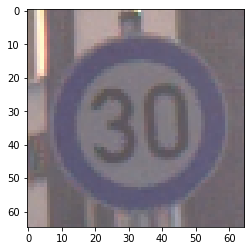

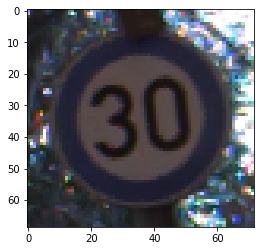

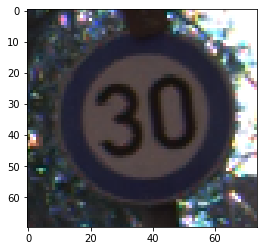

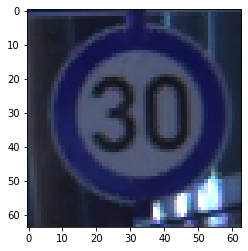

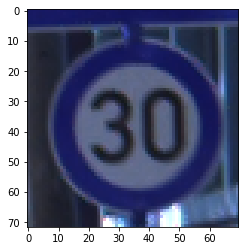

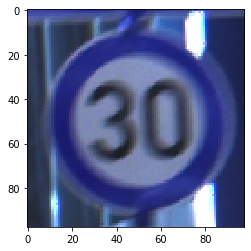

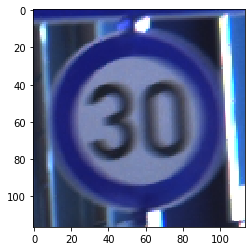

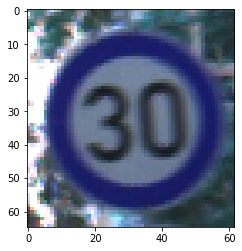

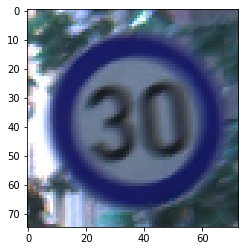

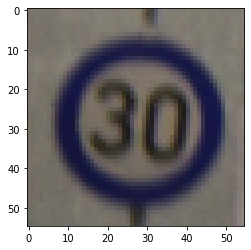

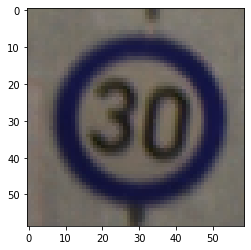

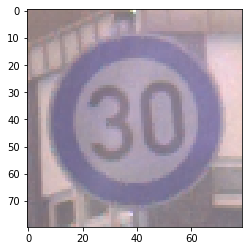

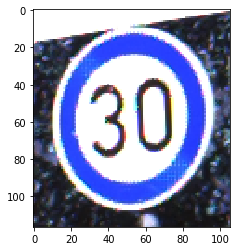

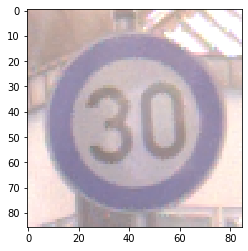

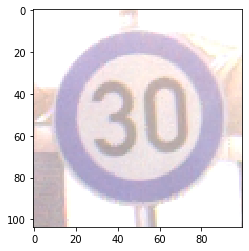

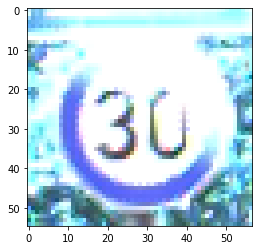

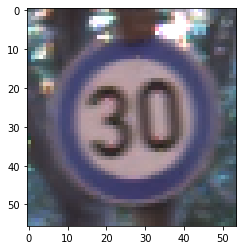

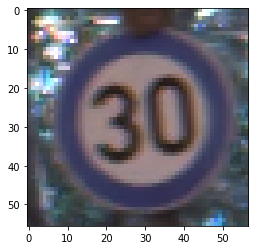

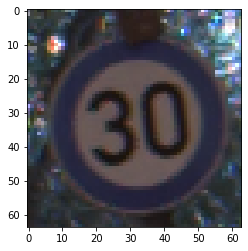

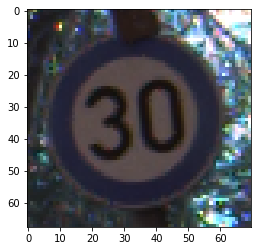

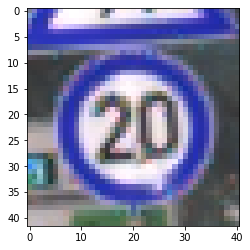

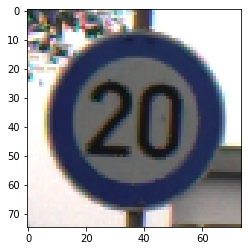

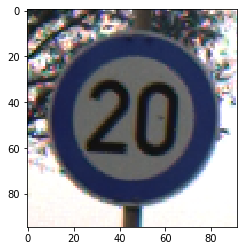

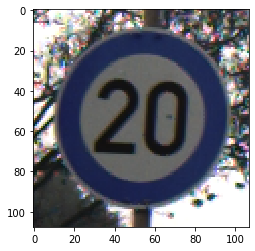

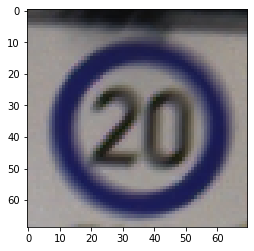

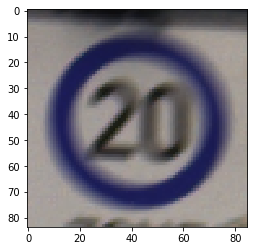

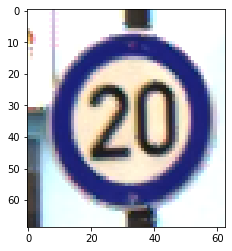

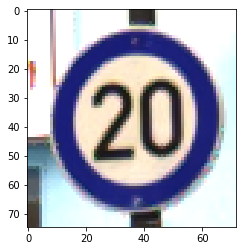

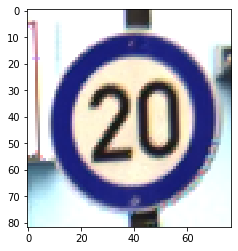

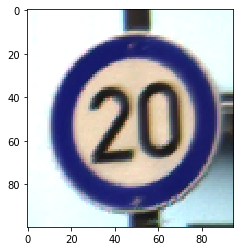

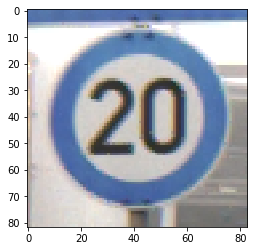

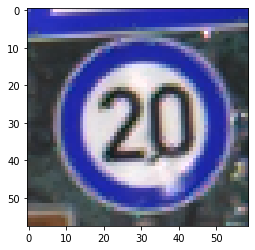

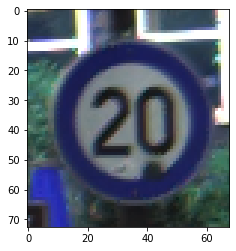

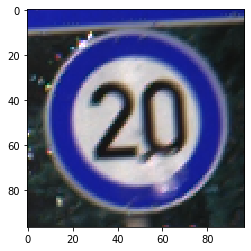

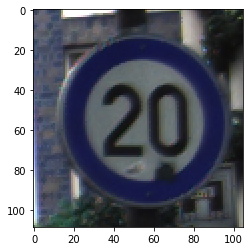

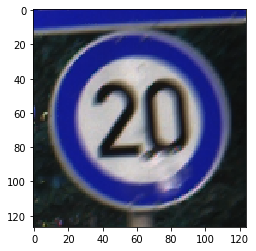

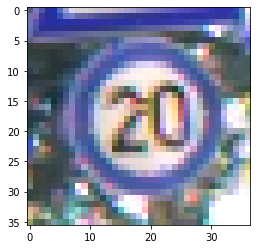

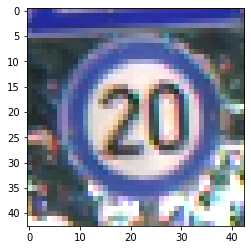

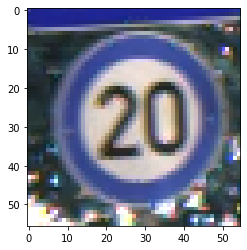

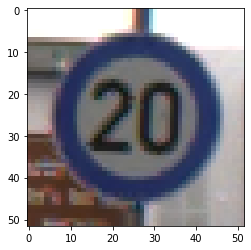

In [86]:
#for presentation print the Images from database
str="G:\Yamuna docs\College docs\Info Ret\Extra credit\Img_recog\img/" 

ncompnts=20
entries=os.listdir(str)
set=1
for entry in entries:
    if entry.endswith(".png") or entry.endswith(".jfif"):
#        print(entry)
        image = cv2.imread(str + entry)
        plt.imshow(image)
        plt.show()